## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [1]:
from IPython.display import clear_output

In [7]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown==4.5
%pip install pandas
%pip install numpy

clear_output()

In [8]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /opt/notebooks/01_Week/Assignments/Walmart.csv
100%|█████████████████████████████████████████| 364k/364k [00:00<00:00, 603kB/s]


In [9]:
import pandas as pd
import numpy as np

In [10]:
data_df = pd.read_csv('Walmart.csv')

In [19]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [21]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [22]:
data_y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [23]:
desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [24]:
x = data_x[["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].apply(lambda x: (x-x.min())/(x.max()-x.min())).to_numpy()

In [25]:
y=data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y = (y-y_min)/(y_max-y_min)

In [26]:
data_x.iloc[:140].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.0,0.071429,68.341071,3.212257,215.837888,7.632650
std,0.0,0.258464,14.396135,0.428763,4.257347,0.355971
min,1.0,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,0.000000,57.682500,2.753000,211.529051,7.348000
50%,1.0,0.000000,69.865000,3.287000,215.391694,7.787000
75%,1.0,0.000000,80.540000,3.579750,220.195306,7.845000
max,1.0,1.000000,91.650000,3.907000,223.181477,8.106000


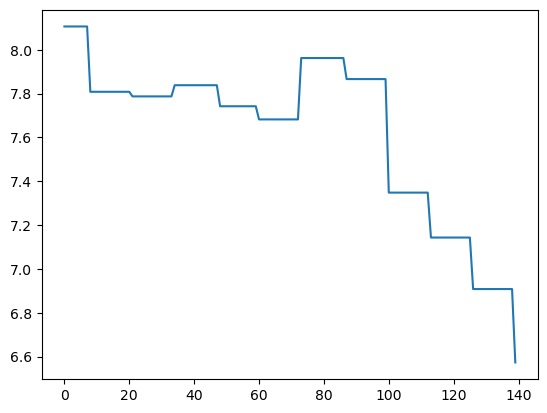

In [45]:
import matplotlib.pyplot as plt

plt.plot(data_x["Unemployment"].iloc[:140])

# Doing it on my own (numpy)

In [261]:
data_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [262]:
# 1 – Remove columns that are not of interest
#     A: I would remove the store column, since we want to predict overall sales of walmart and not drill down for specific loactions

own_df = data_df.drop("Store", axis=1, inplace=False) # axis=1 => delete column, inplace=false => not edit on original data

# print(own_df)

In [263]:
# 2 – Add holiday information

# Check for data type
print("Data-Type before casting: ", type(own_df["Date"].loc[0])) 

# Cast to right datetime format instead of string
own_df["Date"] = pd.to_datetime(own_df["Date"], format="%d-%m-%Y")

# Sanity check
print("Data-Type after casting: ", type(own_df["Date"].loc[0])) 

# Dictionary of holiday dates and types
holiday_dates = {
    "2010-02-12": "Super Bowl",
    "2011-02-11": "Super Bowl",
    "2012-02-10": "Super Bowl",
    "2010-09-10": "Labor Day",
    "2011-09-09": "Labor Day",
    "2012-09-07": "Labor Day",
    "2010-11-26": "Thanksgiving",
    "2011-11-25": "Thanksgiving",
    "2012-11-23": "Thanksgiving",
    "2010-12-31": "Christmas",
    "2011-12-30": "Christmas",
    "2012-12-28": "Christmas"
}

# Add a new column "Holiday_Type" to the DataFrame
own_df["Holiday_Type"] = own_df["Date"].apply(lambda x: holiday_dates.get(x.strftime("%Y-%m-%d"), "None"))

#print(own_df)

Data-Type before casting:  <class 'str'>
Data-Type after casting:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [264]:
# 3 – Normalize data
from sklearn.preprocessing import StandardScaler # Seems to be the best option for linear regression 

# One-hot encode 'Holiday_Type'
# => adds new columns for every holiday and sets the respective entry to 1 if holiday applies other option is 0
own_df = pd.get_dummies(own_df, columns=['Holiday_Type'], drop_first=True)

# Select numerical features to normalize
features_to_normalize = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Centers the data around mean(0) and scales it to have a standard diviation of 1.
scaler = StandardScaler()
own_df[features_to_normalize] = scaler.fit_transform(own_df[features_to_normalize])

# Display the first few rows of the normalized data
#print(own_df.head())

In [265]:
# 4 – Split train and test data 
from sklearn.model_selection import train_test_split


# Create feature matrix, but without "Weekly Sales" (since it is the target) and Date since it is not relevant.
X = own_df.drop(columns=['Weekly_Sales', 'Date'])

# Create target variable vector
y = own_df['Weekly_Sales']

# random_state is seed to have reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)



# Sanity check to see distribution
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (5148, 11)
Testing set shape: (1287, 11)


In [266]:
# 5 – Build regression model

# Add a column of ones to X_train and X_test for the intercept term (bias or called c in normal mx-function) 
ones_train = np.ones((X_train.shape[0], 1))
X_train = np.concatenate([ones_train, X_train], axis=1)

ones_test = np.ones((X_test.shape[0], 1))
X_test = np.concatenate([ones_test, X_test], axis=1)

# Cast to numpy arrays
# Additionally reshape targets to ensure correct dimensions for the matrix operations (multiplication)
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)

X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)

(5148, 10)
(5148, 1)


In [267]:
# 6 – Train the model, using the normal equation

theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

print(theta.shape)

(10, 1)


In [268]:
# 7 – Predict targets with trained model with test data

# Predict
y_pred = X_test @ theta

# Calculate Mean Absolute Error (MAE)
mae_own = np.mean(np.abs(y_pred - y_test))

# Calculate Mean Squared Error (MSE)
mse_own = np.mean((y_pred - y_test) ** 2)

# Print MAE and MSE
print("Own model MAE: ", mae_own)
print("Own model MSE: ", mse_own)

Own model MAE:  0.8448199037827874
Own model MSE:  1.0677088214273223


In [269]:
# Calculate residuals
residuals_own = y_test - y_pred

In [270]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# Visualization

In [289]:
# Create a scatter plot using Plotly
fig = make_subplots()

# Add trace for actual values
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_test.flatten(),
    mode='markers',
    marker=dict(color='blue'),
    name='Actual Values',
    hovertemplate='Index: %{x}<br>Actual Sales: %{y}<extra></extra>'
))

# Add trace for predicted values
fig.add_trace(go.Scatter(
    x=np.arange(len(y_pred)),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='red'),
    name='Predicted Values – Own Method',
    hovertemplate='Index: %{x}<br>Predicted Sales: %{y}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Actual vs. Predicted Weekly Sales',
    xaxis_title='Index',
    yaxis_title='Weekly Sales',
    showlegend=True
)

fig.show()


# Why do the sales number look so wierd?

### Because the sales prediction model got normalized input data. Therefor it adapted to the normalized numbers.


In [272]:
# Create interactive scatter plot for residuals
fig_residuals = go.Figure()

# Add trace for residuals of custom model
fig_residuals.add_trace(go.Scatter(
    x=residuals_own.flatten(),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='blue'),
    name='Residuals (Custom Model)',
    hovertemplate='Residual: %{y}<extra></extra>',
    hoverinfo='text'
))

# Add trace for residuals of sklearn model
fig_residuals.add_trace(go.Scatter(
    x=residuals_sklearn.flatten(),
    y=y_pred_sklearn.flatten(),
    mode='markers',
    marker=dict(color='red'),
    name='Residuals (Sklearn Model)',
    hovertemplate='Residual: %{y}<extra></extra>',
    hoverinfo='text'
))

# Update layout
fig_residuals.update_layout(
    title='Residuals Plot',
    xaxis_title='Predicted Weekly Sales',
    yaxis_title='Residuals',
    showlegend=True
)

fig_residuals.show()


In [273]:
# Interactive Distribution of Residuals Plot
fig_dist_residuals = go.Figure()

# Add histogram for residuals
fig_dist_residuals.add_trace(go.Histogram(
    x=residuals.flatten(),
    nbinsx=30,
    marker=dict(color='blue'),
    name='Residuals Distribution',
    hovertemplate='Residuals: %{x}<br>Frequency: %{y}<extra></extra>'
))

# Update layout
fig_dist_residuals.update_layout(
    title='Distribution of Residuals',
    xaxis_title='Residuals',
    yaxis_title='Frequency',
    showlegend=True
)

fig_dist_residuals.show()

# Solving it with SK-LEARN

In [274]:
from sklearn.linear_model import LinearRegression

In [275]:
# Train a model using sklearn -> LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

In [279]:
# Calculate residuals for sklearn try
residuals_sklearn = y_test - y_pred_sklearn

# Calculate mae, mse for sklearn try
mae_sklearn = np.mean(np.abs(residuals_sklearn))
mse_sklearn = np.mean(residuals_sklearn ** 2)

#print(mae_sklearn)
#print(mse_sklearn)

# Compare the two results

In [287]:
print("MAE own method", mae_own)
print("MSE own method", mse_own)
print("----")
print("MAE sklearn method", mae_sklearn)
print("MSE slearn method", mse_sklearn)

print("\nInterpretation: \n")
print("Lower MAE means that, on average,the model's predictions are closer to the actual values.\n")
print("Lower MSE indicates that the model has fewer large errors, which is to consider if you have a dataset with many outliers. These outliers than dont have such a big impact")

print("\n-> sklearn model is preferable since it has a lower mae as well as mse")

MAE own method 0.8448199037827874
MSE own method 1.0677088214273223
----
MAE sklearn method 0.8236269321429444
MSE slearn method 0.9718246787199474

Interpretation: 

Lower MAE means that, on average,the model's predictions are closer to the actual values.

Lower MSE indicates that the model has fewer large errors, which is to consider if you have a dataset with many outliers. These outliers than dont have such a big impact

-> sklearn model is preferable since it has a lower mae as well as mse


In [278]:
# Create a scatter plot using Plotly
fig = make_subplots()

# Add trace for actual values
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_test.flatten(),
    mode='markers',
    marker=dict(color='blue'),
    name='Actual Values',
    hovertemplate='Index: %{x}<br>Actual Sales: %{y}<extra></extra>'
))

# Add trace for predicted values (own method)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_pred)),
    y=y_pred.flatten(),
    mode='markers',
    marker=dict(color='red'),
    name='Predicted Values – Own Method',
    hovertemplate='Index: %{x}<br>Predicted Sales: %{y}<extra></extra>'
))


# Add trace for predicted values (sklearn method)
fig.add_trace(go.Scatter(
    x=np.arange(len(y_pred_sklearn)),
    y=y_pred_sklearn.flatten(),
    mode='markers',
    marker=dict(color='green'),
    name='Predicted Values – sklearn',
    hovertemplate='Index: %{x}<br>Predicted Sales: %{y}<extra></extra>'
))


# Update layout
fig.update_layout(
    title='Actual vs. Predicted Weekly Sales',
    xaxis_title='Index',
    yaxis_title='Weekly Sales',
    showlegend=True
)

fig.show()